In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns

thesis_params = {"xtick.minor.visible": True,
                 "xtick.major.pad":5,
                 "xtick.direction":"in",
                 "xtick.top":True,
                 "ytick.minor.visible": True,
                 "ytick.direction":"in",
                 "ytick.right":True,
                 "font.family":"Helvetica",
                 "font.size":12.0,
                 "lines.linewidth":2,
                 "legend.frameon":False,
                 "legend.labelspacing":0,
                 "legend.borderpad":0.5}

In [2]:
def Import_Xsecs(directory):
    # Get list of file names in the directory
    file_names = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    imports = []
    # Import each file
    for file_name in file_names:
        # Remove file extension
        module_name = os.path.splitext(file_name)[0]
        imports.append(module_name)
        # Import file
        globals()[module_name] = pd.read_csv(os.path.join(directory, file_name), skiprows=2, names=['Energy / nm', 'Cross section / cm^2'])
    return imports


In [3]:
imports_experimental = Import_Xsecs('Data/Xsecs/Experimental')
print(imports_experimental)

['Experimental_Cheng_1999', 'Experimental_Chung_2001_250K', 'Experimental_Chung_2001_295K', 'Experimental_Lee_Suto_1986', 'Experimental_Mota_2005']


In [4]:
Experimental_Cheng_1999['Cross section / cm^2'] = Experimental_Cheng_1999['Cross section / cm^2']*1e18
Experimental_Mota_2005['Energy / nm'] = 1240/Experimental_Mota_2005['Energy / nm']
Experimental_Chung_2001_250K['Cross section / cm^2'] = Experimental_Chung_2001_250K['Cross section / cm^2']/10
Experimental_Chung_2001_295K['Cross section / cm^2'] = Experimental_Chung_2001_295K['Cross section / cm^2']/10

#Flip Mota for use later
Experimental_Mota_2005 = Experimental_Mota_2005.sort_values(by='Energy / nm', ascending=True)

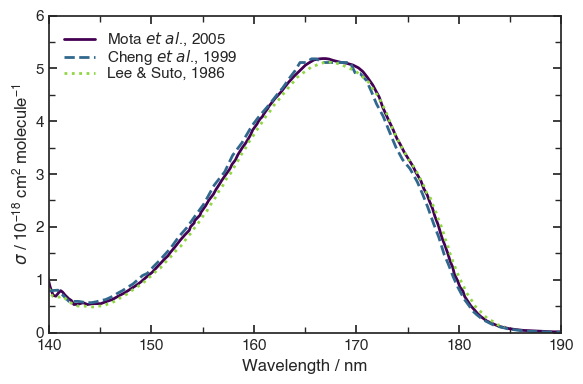

In [5]:
sns.set_theme(style='ticks', rc=thesis_params)

fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot(data=Experimental_Mota_2005, x='Energy / nm', y='Cross section / cm^2', label='Mota $\it{et}$ $\it{al}$., 2005', ax=ax, color='#440154')
sns.lineplot(data=Experimental_Cheng_1999, x='Energy / nm', y='Cross section / cm^2', label='Cheng $\it{et}$ $\it{al}$., 1999', ax=ax, color='#31688e', linestyle='--')
sns.lineplot(data=Experimental_Lee_Suto_1986, x='Energy / nm', y='Cross section / cm^2', label='Lee & Suto, 1986', ax=ax, color='#90d743', linestyle=':')

ax.set_xlabel('Wavelength / nm')
ax.set_xlim(140,190)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.set_ylabel(r'$\sigma$ / 10$\mathregular{^{-18}}$ cm$\mathregular{^{2}}$ molecule$\mathregular{^{-1}}$')
ax.set_ylim(0, 6)
ax.legend()
ax.tick_params(axis='x')
ax.tick_params(axis='y')


plt.tight_layout()
plt.savefig('Plots/Thesis/Experimental_XSecs.png', dpi=200)

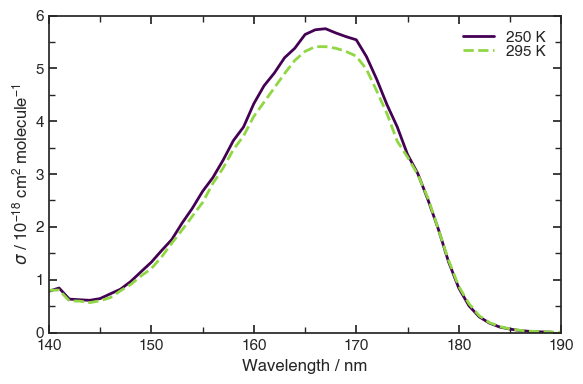

In [6]:
sns.set_theme(style='ticks', rc=thesis_params)

fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot(data=Experimental_Chung_2001_250K, x='Energy / nm', y='Cross section / cm^2', label='250 K', ax=ax, color='#440154')
sns.lineplot(data=Experimental_Chung_2001_295K, x='Energy / nm', y='Cross section / cm^2', label='295 K', ax=ax, color='#90d743', linestyle='--')

ax.set_xlabel('Wavelength / nm')
ax.set_xlim(140,190)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.set_ylabel(r'$\sigma$ / 10$\mathregular{^{-18}}$ cm$\mathregular{^{2}}$ molecule$\mathregular{^{-1}}$')
ax.set_ylim(0, 6)
ax.legend()

plt.tight_layout()
plt.savefig('Plots/Experimental_TempDep_XSecs.png', dpi=200)

In [7]:
imports_theoretical = Import_Xsecs('Data/Xsecs')
print(imports_theoretical)

['cc3_1000K', 'cc3_300K', 'cmd_1000k_schwenke_ccsd_VDZ', 'cmd_300k_schwenke_ccsd_VDZ', 'EOM_CCSD__aug_cc_pVDZ', 'EOM_CCSD__aug_cc_pVTZ', 'pigle4_1000k_qtip4p_ccsd_VDZ', 'pigle4_1000k_schwenke_ccsd_VDZ', 'pigle4_300k_qtip4p_ccsd_VDZ', 'pigle4_300k_schwenke_ccsd_VDZ', 'pigle4_300k_schwenke_ccsd_VDZ_4000', 'qtip4pf_optimized_single_point']


In [8]:
# List of files to process
variables = ['cc3_300K',
             'cc3_1000K',
             'cmd_1000k_schwenke_ccsd_VDZ',
             'cmd_300k_schwenke_ccsd_VDZ',
             'EOM_CCSD__aug_cc_pVDZ',
             'EOM_CCSD__aug_cc_pVTZ',
             'pigle4_1000k_qtip4p_ccsd_VDZ',
             'pigle4_1000k_schwenke_ccsd_VDZ',
             'pigle4_300k_qtip4p_ccsd_VDZ',
             'pigle4_300k_schwenke_ccsd_VDZ',
             'pigle4_300k_schwenke_ccsd_VDZ_4000',
             'qtip4pf_optimized_single_point']

# Loop over variables and update the 'Cross section / cm^2' column
for variable in variables:
    if variable in globals() and isinstance(globals()[variable], pd.DataFrame):
        globals()[variable]['Cross section / cm^2'] *= 1e18

In [9]:
def calc_integral(df):
    # Extract the relevant data from the cc3_300K DataFrame
    wavelengths = df['Energy / nm'].values
    cross_sections = df['Cross section / cm^2'].values

    # Find the indices corresponding to the desired wavelength range
    start_index = np.argmax(wavelengths >= 145)
    end_index = np.argmax(wavelengths >= 190)

    # Slice the arrays to get the desired range
    wavelengths_range = wavelengths[start_index:end_index]
    cross_sections_range = cross_sections[start_index:end_index]

    # Integrate using the trapezoidal rule
    integral = np.trapz(cross_sections_range, wavelengths_range)

    print("Integral between 145 and 190 nm: ", integral)

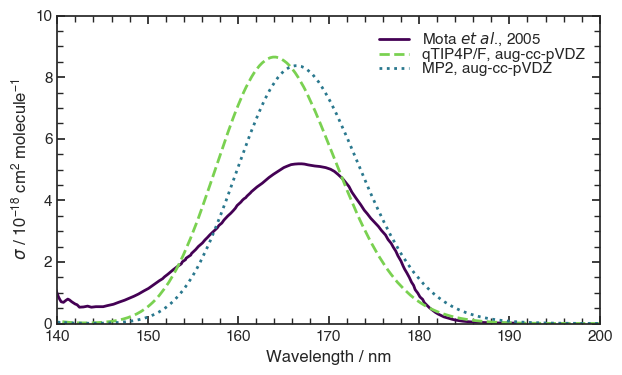

In [10]:
sns.set_theme(style='ticks', rc=thesis_params)

fig, ax = plt.subplots(figsize=(7, 4))

sns.lineplot(data=Experimental_Mota_2005, x='Energy / nm', y='Cross section / cm^2', label='Mota $\it{et}$ $\it{al}$., 2005', ax=ax, c='#440154')
sns.lineplot(data=qtip4pf_optimized_single_point, x='Energy / nm', y='Cross section / cm^2', label='qTIP4P/F, aug-cc-pVDZ', linestyle='--', ax=ax, c='#7ad151')
sns.lineplot(data=EOM_CCSD__aug_cc_pVDZ, x='Energy / nm', y='Cross section / cm^2', label='MP2, aug-cc-pVDZ', linestyle=':', ax=ax, c='#2a788e')

ax.set_xlabel('Wavelength / nm')
ax.set_xlim(140,200)
ax.set_ylabel(r'$\sigma$ / 10$\mathregular{^{-18}}$ cm$\mathregular{^{2}}$ molecule$\mathregular{^{-1}}$')
ax.set_ylim(0, 10)
ax.legend(loc='best')

plt.savefig('Plots/SinglePoint_XSecs.png', dpi=200)

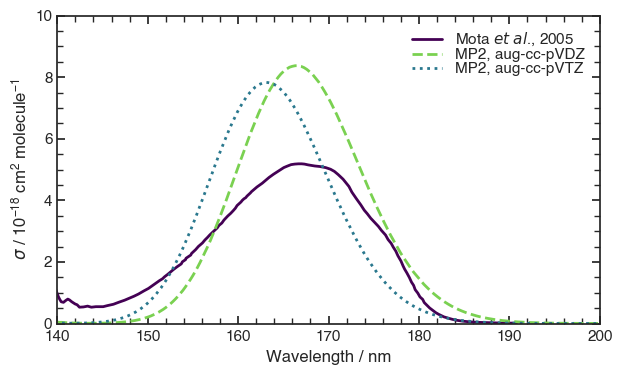

In [11]:
sns.set_theme(style='ticks', rc=thesis_params)

fig, ax = plt.subplots(figsize=(7, 4))

sns.lineplot(data=Experimental_Mota_2005, x='Energy / nm', y='Cross section / cm^2', label='Mota $\it{et}$ $\it{al}$., 2005', ax=ax, c='#440154')
sns.lineplot(data=EOM_CCSD__aug_cc_pVDZ, x='Energy / nm', y='Cross section / cm^2', label='MP2, aug-cc-pVDZ', linestyle='--', ax=ax, c='#7ad151')
sns.lineplot(data=EOM_CCSD__aug_cc_pVTZ, x='Energy / nm', y='Cross section / cm^2', label='MP2, aug-cc-pVTZ', linestyle=':', ax=ax, c='#2a788e')

ax.set_xlabel('Wavelength / nm')
ax.set_xlim(140,200)
ax.set_ylabel(r'$\sigma$ / 10$\mathregular{^{-18}}$ cm$\mathregular{^{2}}$ molecule$\mathregular{^{-1}}$')
ax.set_ylim(0, 10)
ax.legend(loc='best')

plt.savefig('Plots/SinglePoint_XSecs_Appendix.png', dpi=200)

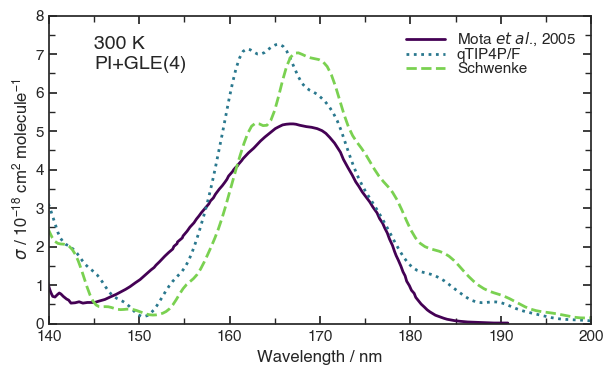

In [12]:
sns.set_theme(style='ticks', rc=thesis_params)

fig, ax = plt.subplots(figsize=(7, 4))
sns.lineplot(data=Experimental_Mota_2005, x='Energy / nm', y='Cross section / cm^2', label='Mota $\it{et}$ $\it{al}$., 2005', c='#440154', ax=ax)
sns.lineplot(data=pigle4_300k_qtip4p_ccsd_VDZ, x='Energy / nm', y='Cross section / cm^2', label='qTIP4P/F', linestyle=':', c='#2a788e', ax=ax)
sns.lineplot(data=pigle4_300k_schwenke_ccsd_VDZ, x='Energy / nm', y='Cross section / cm^2', label='Schwenke', linestyle='--', c='#7ad151', ax=ax)
ax.text(145, 6.5, '300 K\nPI+GLE(4)', ha='left', va='bottom', fontsize=14)
ax.legend(handlelength=2.5)
ax.set_xlabel('Wavelength / nm')
ax.set_xlim(140,200)
ax.set_ylabel(r'$\sigma$ / 10$\mathregular{^{-18}}$ cm$\mathregular{^{2}}$ molecule$\mathregular{^{-1}}$')
ax.set_ylim(0, 8)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

plt.savefig('Plots/PIGLE4_300K_XSecs.png', dpi=200)

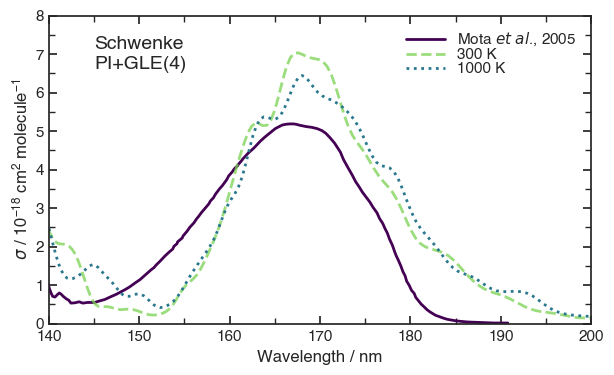

In [13]:
sns.set_theme(style='ticks', rc=thesis_params)

fig, ax = plt.subplots(figsize=(7, 4))
sns.lineplot(data=Experimental_Mota_2005, x='Energy / nm', y='Cross section / cm^2', label='Mota $\it{et}$ $\it{al}$., 2005', c='#440154', ax=ax)
sns.lineplot(data=pigle4_300k_schwenke_ccsd_VDZ, x='Energy / nm', y='Cross section / cm^2', label='300 K', linestyle='--', c='#7ad151', alpha=0.75, ax=ax)
sns.lineplot(data=pigle4_1000k_schwenke_ccsd_VDZ, x='Energy / nm', y='Cross section / cm^2', label='1000 K', linestyle=':', c='#2a788e', ax=ax)
ax.text(145, 6.5, 'Schwenke\nPI+GLE(4)', ha='left', va='bottom', fontsize=14)
ax.legend(handlelength=2.5)
ax.set_xlabel('Wavelength / nm')
ax.set_xlim(140,200)
ax.set_ylabel(r'$\sigma$ / 10$\mathregular{^{-18}}$ cm$\mathregular{^{2}}$ molecule$\mathregular{^{-1}}$')
ax.set_ylim(0, 8)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

plt.savefig('Plots/PIGLE4_1000Geom_XSecs_Schwenke.png', dpi=200)

In [14]:
pigle4_300k_schwenke_ccsd_VDZ = pigle4_300k_schwenke_ccsd_VDZ.sort_values(by='Energy / nm', ascending=True)
pigle4_1000k_schwenke_ccsd_VDZ = pigle4_1000k_schwenke_ccsd_VDZ.sort_values(by='Energy / nm', ascending=True)
pigle4_300k_qtip4p_ccsd_VDZ = pigle4_300k_qtip4p_ccsd_VDZ.sort_values(by='Energy / nm', ascending=True)

In [15]:
print('300K:')
calc_integral(pigle4_300k_qtip4p_ccsd_VDZ)

print('300K:')
calc_integral(pigle4_300k_schwenke_ccsd_VDZ)

print('1000K:')
calc_integral(pigle4_1000k_schwenke_ccsd_VDZ)

print('Experimental:')
calc_integral(Experimental_Mota_2005)

300K:
Integral between 145 and 190 nm:  135.84601987655
300K:
Integral between 145 and 190 nm:  131.41274728612666
1000K:
Integral between 145 and 190 nm:  133.2417411256984
Experimental:
Integral between 145 and 190 nm:  110.07627689884252


In [16]:
(135.84601987655/110.07627689884252*100)-100

23.410805401230334

In [17]:
(131.41274728612666/110.07627689884252*100)-100

19.383350335233303

In [18]:
(133.2417411256984/131.41274728612666*100)-100

1.3917933209245348

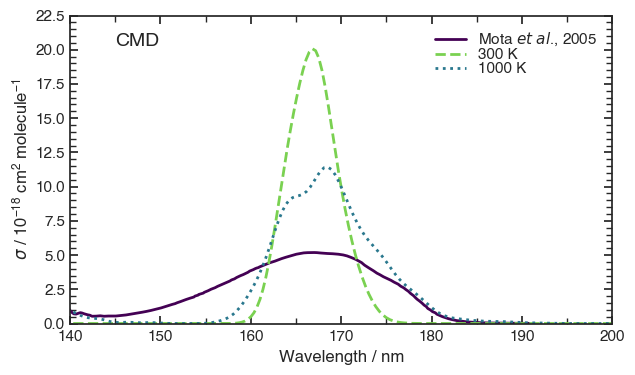

In [19]:
sns.set_theme(style='ticks', rc=thesis_params)

fig, ax = plt.subplots(figsize=(7, 4))
sns.lineplot(data=Experimental_Mota_2005, x='Energy / nm', y='Cross section / cm^2', label='Mota $\it{et}$ $\it{al}$., 2005', c='#440154', ax=ax)
sns.lineplot(data=cmd_300k_schwenke_ccsd_VDZ, x='Energy / nm', y='Cross section / cm^2', label='300 K', linestyle='--', c='#7ad151', ax=ax)
sns.lineplot(data=cmd_1000k_schwenke_ccsd_VDZ, x='Energy / nm', y='Cross section / cm^2', label='1000 K', linestyle=':', c='#2a788e', ax=ax)
ax.text(145, 20, 'CMD', ha='left', va='bottom', fontsize=14)

ax.set_xlabel('Wavelength / nm')
ax.set_xlim(140,200)
ax.set_ylabel(r'$\sigma$ / 10$\mathregular{^{-18}}$ cm$\mathregular{^{2}}$ molecule$\mathregular{^{-1}}$')
ax.set_ylim(0, 22.5)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

plt.savefig('Plots/CMD_1000Geom_XSecs_Schwenke.png', dpi=200)

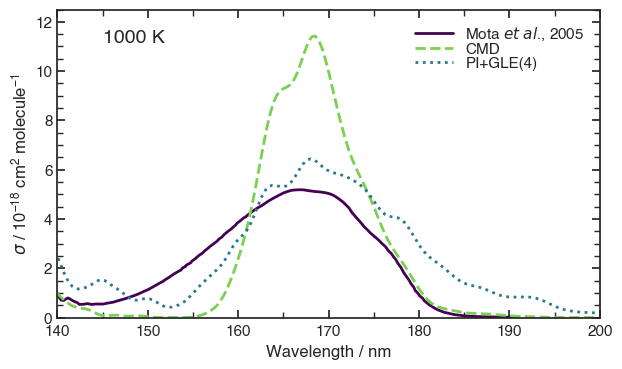

In [20]:
sns.set_theme(style='ticks', rc=thesis_params)

fig, ax = plt.subplots(figsize=(7, 4))
sns.lineplot(data=Experimental_Mota_2005, x='Energy / nm', y='Cross section / cm^2', label='Mota $\it{et}$ $\it{al}$., 2005', c='#440154', ax=ax)
sns.lineplot(data=cmd_1000k_schwenke_ccsd_VDZ, x='Energy / nm', y='Cross section / cm^2', label='CMD', linestyle='--', c='#7ad151', ax=ax)
sns.lineplot(data=pigle4_1000k_schwenke_ccsd_VDZ, x='Energy / nm', y='Cross section / cm^2', label='PI+GLE(4)', linestyle=':', c='#2a788e', ax=ax)
ax.text(145, 11, '1000 K', ha='left', va='bottom', fontsize=14)
ax.legend(handlelength=2.5)
ax.set_xlabel('Wavelength / nm')
ax.set_xlim(140,200)
ax.set_ylabel(r'$\sigma$ / 10$\mathregular{^{-18}}$ cm$\mathregular{^{2}}$ molecule$\mathregular{^{-1}}$')
ax.set_ylim(0, 12.5)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

plt.savefig('Plots/CMD_vs_PIGLE_XSecs_Schwenke.png', dpi=200)

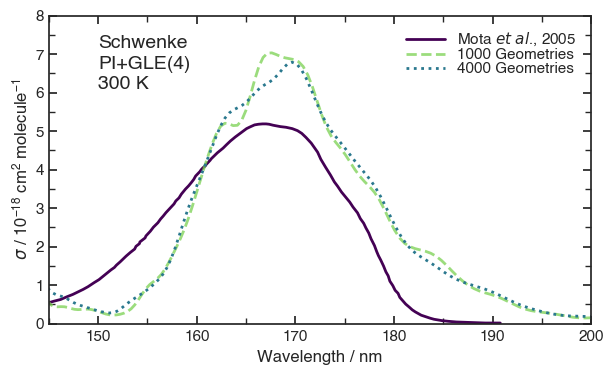

In [21]:
sns.set_theme(style='ticks', rc=thesis_params)

fig, ax = plt.subplots(figsize=(7, 4))
sns.lineplot(data=Experimental_Mota_2005, x='Energy / nm', y='Cross section / cm^2', label='Mota $\it{et}$ $\it{al}$., 2005', c='#440154', ax=ax)
sns.lineplot(data=pigle4_300k_schwenke_ccsd_VDZ, x='Energy / nm', y='Cross section / cm^2', label='1000 Geometries', linestyle='--', c='#7ad151', alpha=0.75, ax=ax)
sns.lineplot(data=pigle4_300k_schwenke_ccsd_VDZ_4000, x='Energy / nm', y='Cross section / cm^2', label='4000 Geometries', linestyle=':', c='#2a788e', ax=ax)
ax.text(150, 6, 'Schwenke\nPI+GLE(4)\n300 K', ha='left', va='bottom', fontsize=14)
ax.legend(handlelength=2.5)
ax.set_xlabel('Wavelength / nm')
ax.set_xlim(145,200)
ax.set_ylabel(r'$\sigma$ / 10$\mathregular{^{-18}}$ cm$\mathregular{^{2}}$ molecule$\mathregular{^{-1}}$')
ax.set_ylim(0, 8)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

plt.savefig('Plots/PIGLE4_300Geom_XSecs_4000_geoms.png', dpi=200)

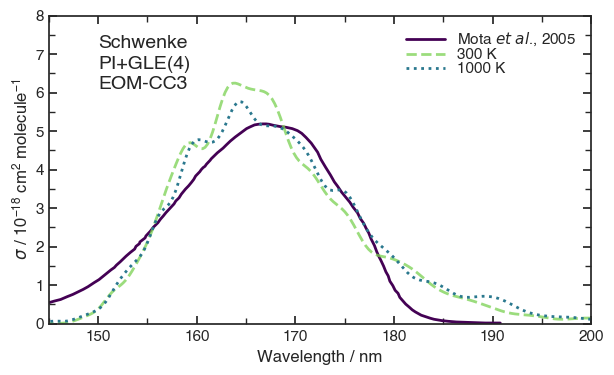

In [22]:
sns.set_theme(style='ticks', rc=thesis_params)

fig, ax = plt.subplots(figsize=(7, 4))
sns.lineplot(data=Experimental_Mota_2005, x='Energy / nm', y='Cross section / cm^2', label='Mota $\it{et}$ $\it{al}$., 2005', c='#440154', ax=ax)
sns.lineplot(data=cc3_300K, x='Energy / nm', y='Cross section / cm^2', label='300 K', linestyle='--', c='#7ad151', alpha=0.75, ax=ax)
sns.lineplot(data=cc3_1000K, x='Energy / nm', y='Cross section / cm^2', label='1000 K', linestyle=':', c='#2a788e', ax=ax)
ax.text(150, 6, 'Schwenke\nPI+GLE(4)\nEOM-CC3', ha='left', va='bottom', fontsize=14)
ax.legend(handlelength=2.5)
ax.set_xlabel('Wavelength / nm')
ax.set_xlim(145,200)
ax.set_ylabel(r'$\sigma$ / 10$\mathregular{^{-18}}$ cm$\mathregular{^{2}}$ molecule$\mathregular{^{-1}}$')
ax.set_ylim(0, 8)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

plt.savefig('Plots/PIGLE4_CC3.png', dpi=200)

In [23]:
print('300K:')
calc_integral(cc3_300K)

print('1000K:')
calc_integral(cc3_1000K)

print('Experimental:')
calc_integral(Experimental_Mota_2005)

300K:
Integral between 145 and 190 nm:  118.13221234338792
1000K:
Integral between 145 and 190 nm:  117.05041179654049
Experimental:
Integral between 145 and 190 nm:  110.07627689884252


### Presentation Plots

In [24]:
presentation_params = {"axes.labelsize": 16.0,
                 "xtick.minor.visible": True,
                 "xtick.major.pad":5,
                 "xtick.direction":"in",
                 "xtick.top":True,
                 "xtick.labelsize":16.0,
                 "ytick.minor.visible": True,
                 "ytick.direction":"in",
                 "ytick.right":True,
                 "ytick.labelsize":16.0,
                 "font.family":"Helvetica",
                 "font.size":16.0,
                 "lines.linewidth":2.5,
                 "legend.frameon":False,
                 "legend.labelspacing":0.1,
                 "legend.borderpad":0.5,
                 "legend.fontsize":16.0}

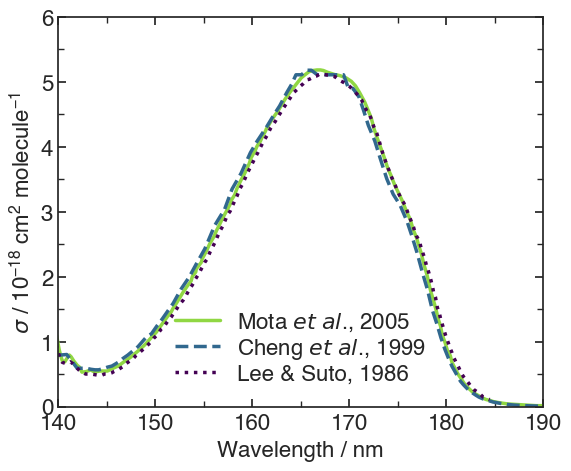

In [25]:
sns.set_theme(style='ticks', rc=presentation_params)

fig, ax = plt.subplots(figsize=(6, 5))
sns.lineplot(data=Experimental_Mota_2005, x='Energy / nm', y='Cross section / cm^2', label='Mota $\it{et}$ $\it{al}$., 2005', ax=ax, color='#90d743')
sns.lineplot(data=Experimental_Cheng_1999, x='Energy / nm', y='Cross section / cm^2', label='Cheng $\it{et}$ $\it{al}$., 1999', ax=ax, color='#31688e', linestyle='--')
sns.lineplot(data=Experimental_Lee_Suto_1986, x='Energy / nm', y='Cross section / cm^2', label='Lee & Suto, 1986', ax=ax, color='#440154', linestyle=':')

ax.set_xlabel('Wavelength / nm', fontsize=16)
ax.set_xlim(140,190)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.set_ylabel(r'$\sigma$ / 10$\mathregular{^{-18}}$ cm$\mathregular{^{2}}$ molecule$\mathregular{^{-1}}$', fontsize=16)
ax.set_ylim(0, 6)
ax.legend(fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)


plt.tight_layout()
plt.savefig('Plots/Presentation/Experimental_XSecs.png', dpi=200)

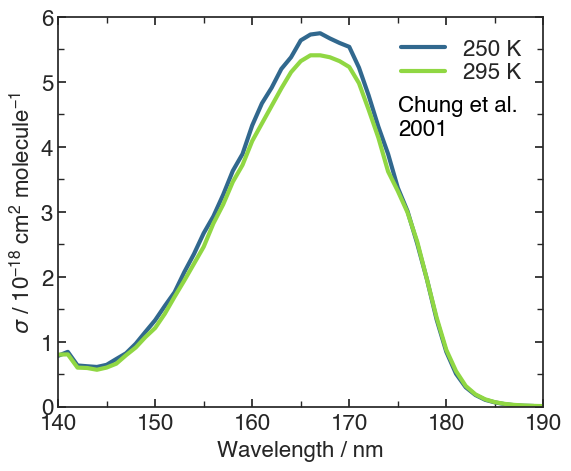

In [26]:
sns.set_theme(style='ticks', rc=presentation_params)

fig, ax = plt.subplots(figsize=(6, 5))
sns.lineplot(data=Experimental_Chung_2001_250K, x='Energy / nm', y='Cross section / cm^2', label='250 K', ax=ax, linewidth=3, color='#31688e')
sns.lineplot(data=Experimental_Chung_2001_295K, x='Energy / nm', y='Cross section / cm^2', label='295 K', ax=ax, linewidth=3, color='#90d743')


ax.text(175, 4.1, 'Chung et al.\n2001', ha='left', va='bottom', fontsize=16, color='black')
ax.set_xlabel('Wavelength / nm', fontsize=16)
ax.set_xlim(140,190)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.set_ylabel(r'$\sigma$ / 10$\mathregular{^{-18}}$ cm$\mathregular{^{2}}$ molecule$\mathregular{^{-1}}$', fontsize=16)
ax.set_ylim(0, 6)
ax.legend(fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.tight_layout()
plt.savefig('Plots/Presentation/Experimental_TempDep_XSecs.png', dpi=200)

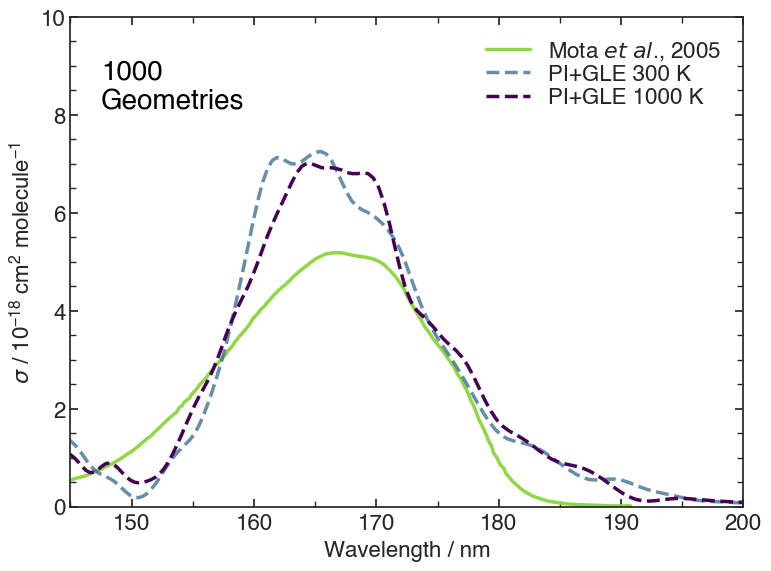

In [27]:
sns.set_theme(style='ticks', rc=presentation_params)

fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(data=Experimental_Mota_2005, x='Energy / nm', y='Cross section / cm^2', label='Mota $\it{et}$ $\it{al}$., 2005', color='#90d743', ax=ax)
sns.lineplot(data=pigle4_300k_qtip4p_ccsd_VDZ, x='Energy / nm', y='Cross section / cm^2', label='PI+GLE 300 K', linestyle='--', c='#31688e', alpha=0.75, ax=ax)
sns.lineplot(data=pigle4_1000k_qtip4p_ccsd_VDZ, x='Energy / nm', y='Cross section / cm^2', label='PI+GLE 1000 K', linestyle='--', c='#440154', ax=ax)
#ax.text(145, 7, 'Nuclear Ensemble', ha='left', va='bottom', fontsize=20)

ax.set_xlabel('Wavelength / nm')
ax.set_xlim(145,200)
ax.set_ylabel(r'$\sigma$ / 10$\mathregular{^{-18}}$ cm$\mathregular{^{2}}$ molecule$\mathregular{^{-1}}$')
ax.set_ylim(0, 10)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.legend(loc='best')
ax.text(147.5, 8, '1000\nGeometries', ha='left', va='bottom', fontsize=20, color='black')


plt.tight_layout()
plt.savefig('Plots/Presentation/PIGLE4_1000Geom_XSecs_PRESENTATION.png', dpi=200)

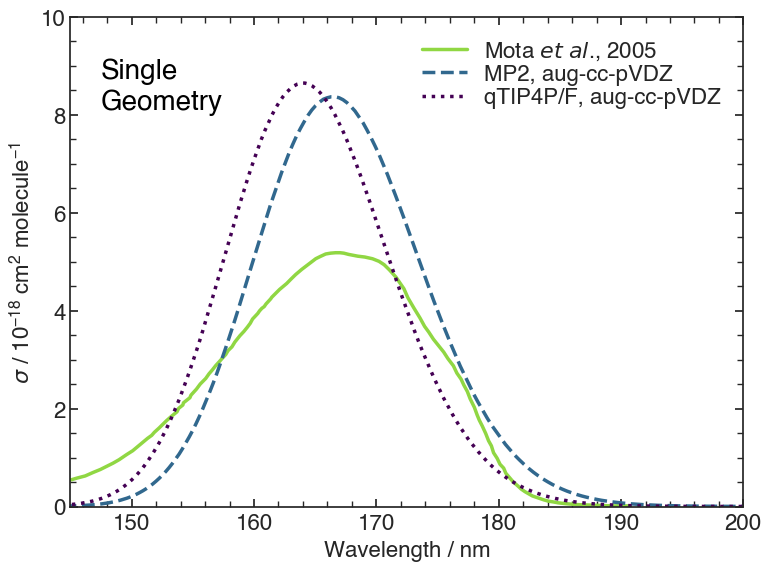

In [28]:
sns.set_theme(style='ticks', rc=presentation_params)

fig, ax = plt.subplots(figsize=(8, 6))

sns.lineplot(data=Experimental_Mota_2005, x='Energy / nm', y='Cross section / cm^2', label='Mota $\it{et}$ $\it{al}$., 2005', ax=ax, color='#90d743')
sns.lineplot(data=EOM_CCSD__aug_cc_pVDZ, x='Energy / nm', y='Cross section / cm^2', label='MP2, aug-cc-pVDZ', linestyle='--', ax=ax, c='#31688e')
sns.lineplot(data=qtip4pf_optimized_single_point, x='Energy / nm', y='Cross section / cm^2', label='qTIP4P/F, aug-cc-pVDZ', linestyle=':', ax=ax, c='#440154')

ax.set_xlabel('Wavelength / nm')
ax.set_xlim(145,200)
ax.set_ylabel(r'$\sigma$ / 10$\mathregular{^{-18}}$ cm$\mathregular{^{2}}$ molecule$\mathregular{^{-1}}$')
ax.set_ylim(0, 10)
ax.legend(loc='best')
ax.text(147.5, 8, 'Single\nGeometry', ha='left', va='bottom', fontsize=20, color='black')

plt.tight_layout()
plt.savefig('Plots/Presentation/SinglePoint_XSecs.png', dpi=200)

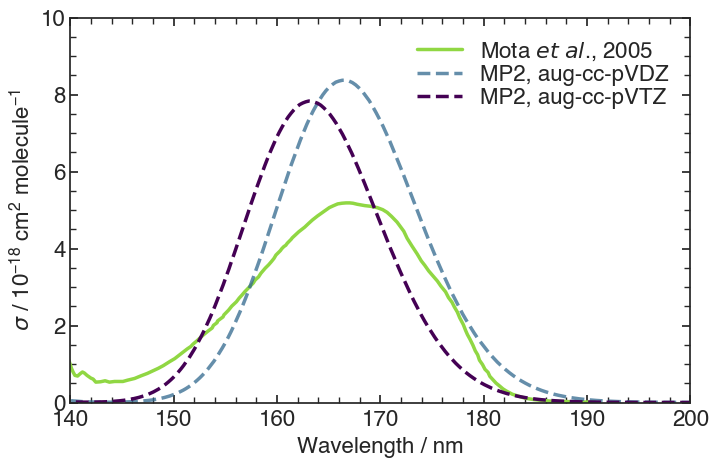

In [29]:
sns.set_theme(style='ticks', rc=presentation_params)

fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(data=Experimental_Mota_2005, x='Energy / nm', y='Cross section / cm^2', label='Mota $\it{et}$ $\it{al}$., 2005', ax=ax, c='#90d743')
sns.lineplot(data=EOM_CCSD__aug_cc_pVDZ, x='Energy / nm', y='Cross section / cm^2', label='MP2, aug-cc-pVDZ', linestyle='--', ax=ax, c='#31688e', alpha=0.75)
sns.lineplot(data=EOM_CCSD__aug_cc_pVTZ, x='Energy / nm', y='Cross section / cm^2', label='MP2, aug-cc-pVTZ', linestyle='--', ax=ax, c='#440154')

ax.set_xlabel('Wavelength / nm')
ax.set_xlim(140,200)
ax.set_ylabel(r'$\sigma$ / 10$\mathregular{^{-18}}$ cm$\mathregular{^{2}}$ molecule$\mathregular{^{-1}}$')
ax.set_ylim(0, 10)
ax.legend(loc='best')

plt.savefig('Plots/Presentation/SinglePoint_XSecs_BasisSet.png', dpi=200)